<a href="https://colab.research.google.com/github/sadhv3/Project_MLAI/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT : LOAN PREDICTION

## Loan is an amount of money that is borrowed, often from a bank, and has to be paid back, usually together with an extra amount of money that you have to pay as a charge for borrowing.


## APPLICANT INCOME : Income from employment is the money you earn from a job. It is what an employer pays you, before taxes or other deductions are taken out (gross income).


## CO-APPLICANT : A co-applicant is an additional person considered in the underwriting and approval of a loan or other type of application. Applying for a loan with a co-applicant can help to improve the chances of loan approval and also provide for more favorable loan terms.


## LOAN AMOUNT TERMS : Loan terms refer to the terms and conditions involved when borrowing money. This can include the loan's repayment period, the interest rate and fees associated with the loan, penalty fees borrowers might be charged, and any other special conditions that may apply.

## * ( When using the Actual/360 method, the annual interest rate is divided by 360 to get the daily interest rate and then multiplied by the days in the month. This creates a larger dollar amount in interest payments because dividing the annual rate by 360 creates a larger daily rate then dividing it by 365. )


## CREDIT HISTORY : Your credit history is a detailed report or statement about your repayments for all your debts and perhaps other financial information. It names which loans you have and how often you have made payments on time or opened new credit. Your credit score is a three-digit number based on this information.

## Working on DataSet


In [ ]:
import pandas as pd

In [ ]:
url = " https://raw.githubusercontent.com/sadhv3/DataSet/main/LoanPredict.csv "
df = pd.read_csv(url)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

### CHANGING Graduate to 1 And Not-Graduate to 0

In [ ]:
df['Education'] = df['Education'].replace('Graduate','1')
df.loc[df.Education == '1','Education'].count()

480

In [ ]:
df['Education'] = df['Education'].replace('Not Graduate','0')
df.loc[df.Education == '0','Education'].count()

134

In [ ]:
df.loc[df.Self_Employed == 'No','Self_Employed'].count()

500

### CHANGING 3+ Dependents to 4

In [ ]:
df['Dependents'] = df['Dependents'].replace('3+','4')
df.loc[df.Dependents == '4','Dependents'].count()

51

### CHANGING Male to 1 And FeMale to 0

In [ ]:
df['Gender'] = df['Gender'].replace('Male', '1')
df['Gender'] = df['Gender'].replace('Female', '0')

In [ ]:
df.loc[df.Gender == '1','Gender'].count()

489

In [ ]:
df.loc[df.Gender == '0','Gender'].count()

112

### CHANGING Married to 1 And UnMarried to 0

In [ ]:
df['Married'] = df['Married'].replace('Yes', '1')
df['Married'] = df['Married'].replace('No', '0')

In [ ]:
df.loc[df.Married == '0','Married'].count()

213

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1,1,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,1,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,0,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1,1,4,1,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1,1,1,1,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1,1,2,1,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.loc[df.Married == '1','Married'].count()

398

### CHANGING Employed to 1 And UnEmployed to 0

In [ ]:
df['Self_Employed'] = df['Self_Employed'].replace('Yes', '1')
df['Self_Employed'] = df['Self_Employed'].replace('No', '0')

In [ ]:
df.loc[df.Self_Employed == '0','Self_Employed'].count()

500

In [ ]:
df.loc[df.Self_Employed == '1','Self_Employed'].count()

82

### CHANGING Granted(Loan) to 1 And NotGranted(Loan) to 0

In [ ]:
df['Loan_Status'] = df['Loan_Status'].replace('Y', '1')
df['Loan_Status'] = df['Loan_Status'].replace('N', '0')

In [ ]:
df.loc[df.Loan_Status == '0','Loan_Status'].count()

192

In [ ]:
df.loc[df.Loan_Status == '1','Loan_Status'].count()

422

### Droping Records Having NaN in Them

In [ ]:
df.drop(df[(df['Gender'] == 'NaN') & (df['Married'] == 'NaN')].index, inplace = True)

In [ ]:
df.drop(df[(df['Dependents'] == 'NaN') & (df['Self_Employed'] == 'NaN')].index, inplace = True)

In [ ]:
df.drop(df[(df['Education'] == 'NaN') & (df['LoanAmount'] == 'NaN')].index, inplace = True)

In [ ]:
df.drop(df[(df['Loan_Amount_Term'] == 'NaN') & (df['Credit_History'] == 'NaN')].index, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
obj = (df.dtypes == 'object')
print("Variable : ",len(list(obj[obj].index)))

Variable :  8


In [ ]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [ ]:
# Droping Loan_ID Column
df.drop(['Loan_ID'],axis=1,inplace=True)

## Checking Relationship Between Different Parameters by Plotting Graph

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df['Loan_Status'] = df['Loan_Status'].astype(int)

In [ ]:
df['Education'] = df['Education'].astype(int)

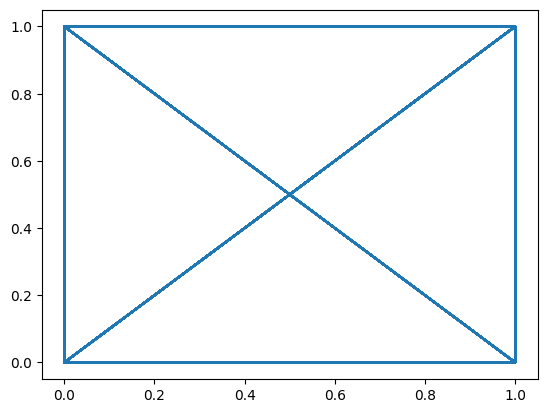

In [ ]:
plt.plot(df['Loan_Status'],df['Education'])

In [ ]:
df.describe()

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,0.781759,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,0.413389,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,1.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,1.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,1.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

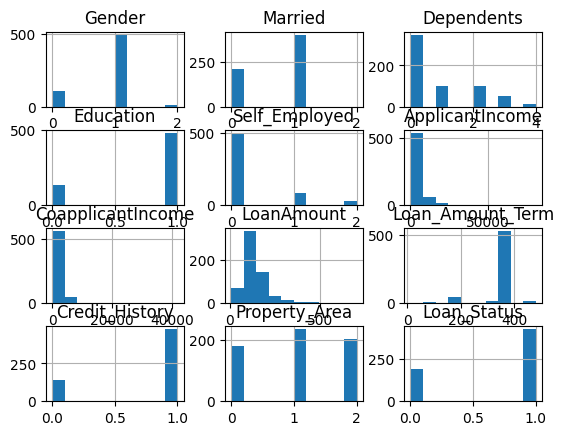

In [ ]:
df.hist()
plt.show

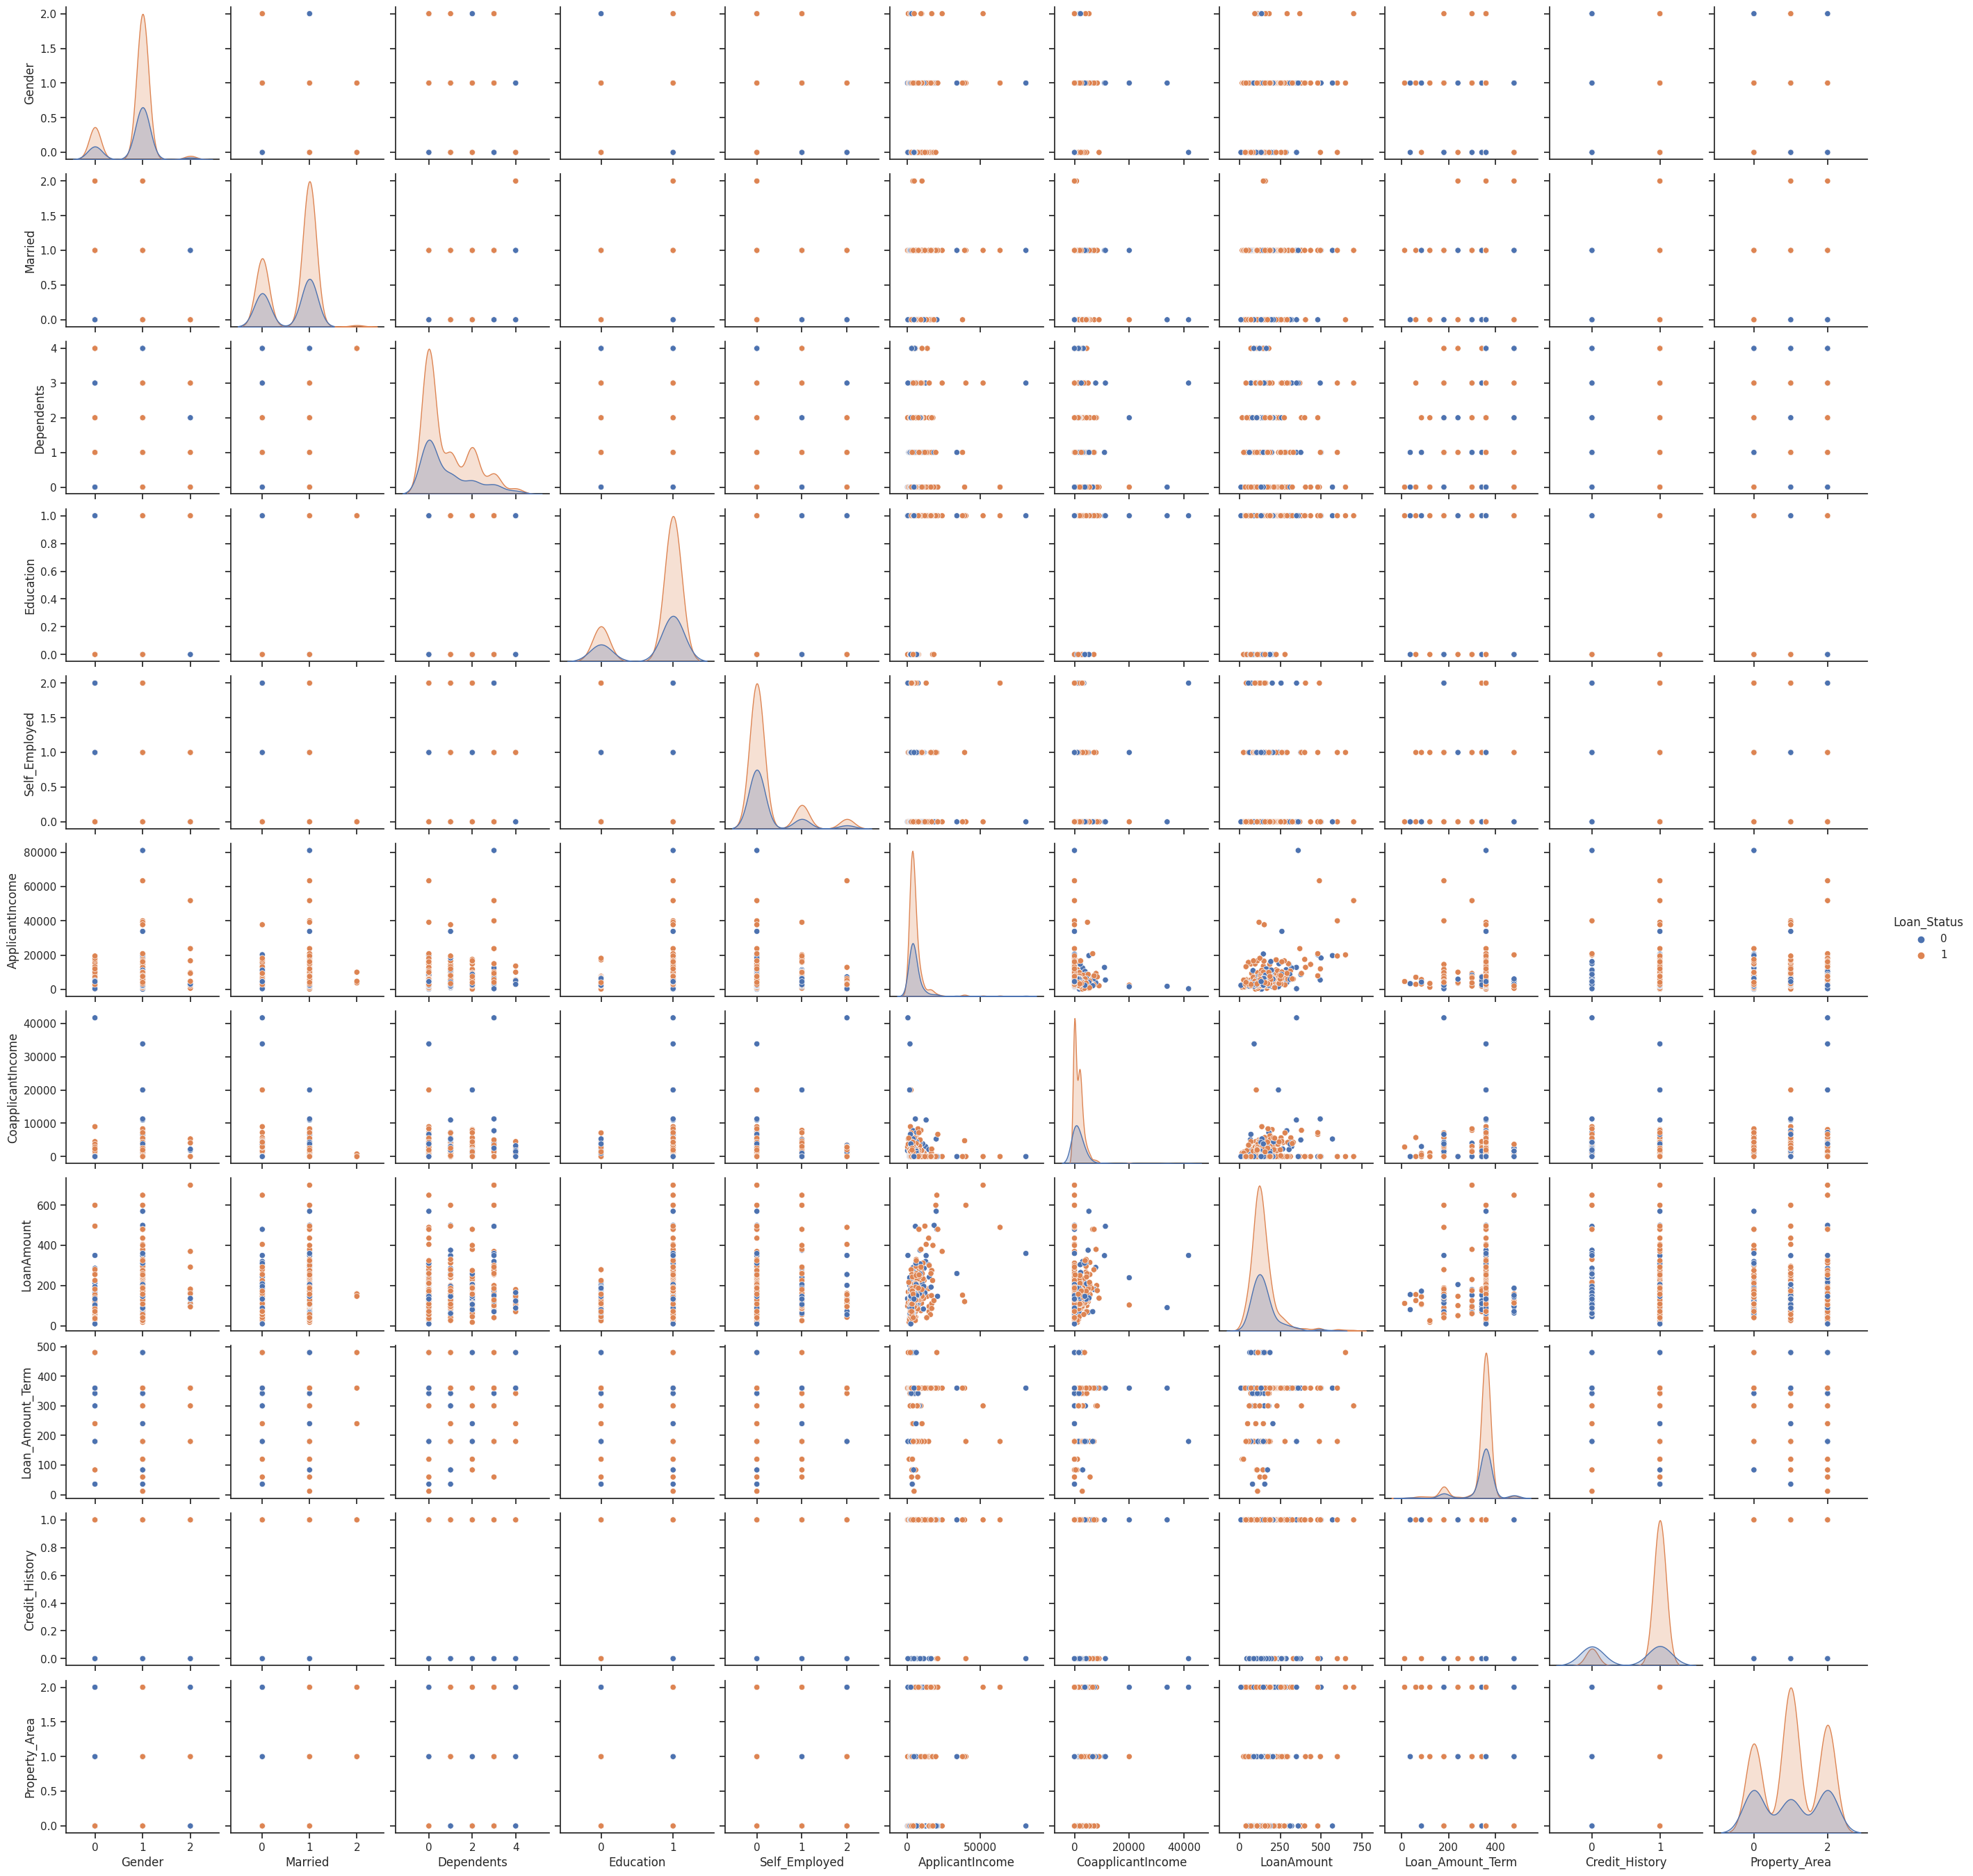

In [ ]:
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 2,4
sns.set_theme(style="ticks")
sns.pairplot(df,hue='Loan_Status')

In [ ]:
obj = (df.dtypes == 'object')
obj_cols = list(obj[obj].index)
#plt.figure(figsize=(15,30))
index = 1

In [ ]:
for col in obj_cols:
  y = df[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x = list(y.index),y=y)
  index+=1

In [ ]:
# Import label encoder
from sklearn import preprocessing
from sklearn import utils

# label_encoder object knows how
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
  df[col] = label_encoder.fit_transform(df[col])

In [ ]:
# To find the number of columns with
# datatype==object
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))


Categorical variables: 0


<Axes: >

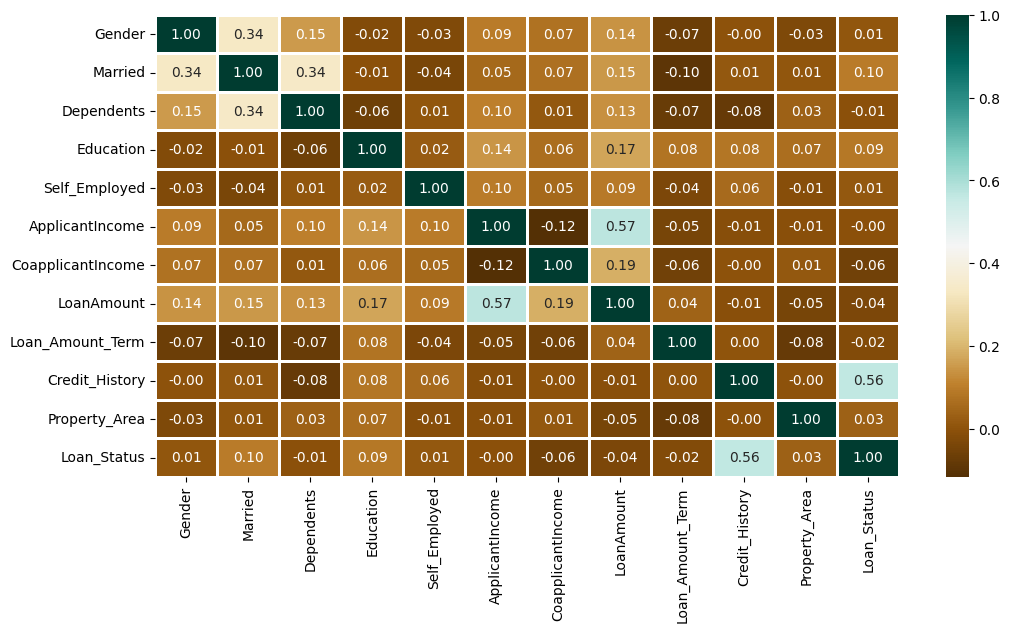

In [ ]:
plt.figure(figsize=(12,6))

sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)


In [ ]:
for col in df.columns:
  df[col] = df[col].fillna(df[col].mean())

df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Loan_Status'],axis=1)
Y = df['Loan_Status']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.4,
                                                    random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((368, 11), (246, 11), (368,), (246,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy',
                             random_state =7)
svc = SVC()
lc = LogisticRegression()

# making predictions on the training set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of ",
          clf.__class__.__name__,
          "=",100*metrics.accuracy_score(Y_train,
                                         Y_pred))


Accuracy score of  RandomForestClassifier = 97.01086956521739
Accuracy score of  KNeighborsClassifier = 77.17391304347827
Accuracy score of  SVC = 70.38043478260869
Accuracy score of  LogisticRegression = 82.6086956521739


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

# making predictions on the testing set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy score of ",
          clf.__class__.__name__,"=",
          100*metrics.accuracy_score(Y_test,
                                     Y_pred))

Accuracy score of  RandomForestClassifier = 76.42276422764228
Accuracy score of  KNeighborsClassifier = 62.19512195121951
Accuracy score of  SVC = 67.07317073170732
Accuracy score of  LogisticRegression = 78.86178861788618


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
df.drop(columns =['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'])

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,1,0,1.0,2,1
1,1,1,1,0,1.0,0,0
2,1,1,1,1,1.0,2,1
3,1,1,0,0,1.0,2,1
4,1,0,1,0,1.0,2,1
...,...,...,...,...,...,...,...
609,0,0,1,0,1.0,0,1
610,1,1,1,0,1.0,0,1
611,1,1,1,0,1.0,2,1
612,1,1,1,0,1.0,2,1


In [ ]:
df['Credit_History'] = df['Credit_History'].astype(int)

In [ ]:
df2 = df.drop(columns =['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'])
print(df2.shape)

(614, 7)


In [ ]:
df2.to_csv('NewFile.csv')

In [ ]:
df2.head(10)

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,1,0,1,2,1
1,1,1,1,0,1,0,0
2,1,1,1,1,1,2,1
3,1,1,0,0,1,2,1
4,1,0,1,0,1,2,1
5,1,1,1,1,1,2,1
6,1,1,0,0,1,2,1
7,1,1,1,0,0,1,0
8,1,1,1,0,1,2,1
9,1,1,1,0,1,1,0


In [ ]:
df1 = df.values

In [ ]:
X = df1[:,0:6]

In [ ]:
Y = df1[:,6]
lab = preprocessing.LabelEncoder()
Y_trans = lab.fit_transform(Y)

In [ ]:
print(X.shape , Y.shape)

(614, 6) (614,)


In [ ]:
# fit this in model
from sklearn.linear_model import LogisticRegression
model1= LogisticRegression()

In [ ]:
classifier = LogisticRegression()
classifier.fit(X, Y_trans)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
classifier.predict([[ 0,0,1,0,1,0]])

array([0])

### Conclusion :
Random Forest Classifier is giving the best accuracy with an accuracy score of 82% for the testing dataset. And to get much better results ensemble learning techniques like Bagging and Boosting can also be used.